In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson

                                                             Assignment starts here
-------------------------------------------------------------------------------------------------------------------------------------------------------------

Question-1 (a)

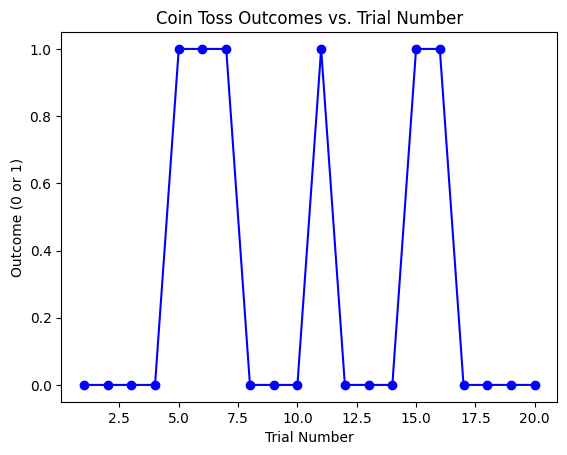

In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap

def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp=1, numTrialsInAnExp=1, profitLoss=[1,0]):
    
    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))

    while (repeatIndex < numRepeatsOfExp):
        observation[repeatIndex,:] = randomNumGen.random((1, numTrialsInAnExp))
        index_ge1 = np.less_equal(observation[repeatIndex,:], bernoulliParam_p)
        observation[repeatIndex,index_ge1] = profitLoss[0]
        observation[repeatIndex, np.invert(index_ge1)] = profitLoss[1]
        repeatIndex = repeatIndex + 1
    
    return observation

# Set parameters
numTrialsInAnExp = 20
bernoulliParam_p = 0.2
numRepeatsOfExp = 1

# Create random number generator
randomNumGen = np.random.RandomState(seed=42)

# Run experiment
observation = aBernoulliExperiment(randomNumGen, bernoulliParam_p=bernoulliParam_p, numRepeatsOfExp=numRepeatsOfExp, numTrialsInAnExp=numTrialsInAnExp)

# Plot outcomes against trial number
fig, ax = plt.subplots()
ax.plot(range(1, numTrialsInAnExp + 1), observation[0], 'bo-')
ax.set_xlabel('Trial Number')
ax.set_ylabel('Outcome (0 or 1)')
ax.set_title('Coin Toss Outcomes vs. Trial Number')

plt.show()


What we observe in the plot is that the outcomes are random and evenly distributed between 0 and 1, which is what we would expect from a fair coin toss. However, since the probability of heads is only 0.2, we would expect to see fewer heads than tails in the long run. In this particular experiment, we may or may not see this expected imbalance, depending on the outcome of the 20 coin tosses.

Question-1 (b)

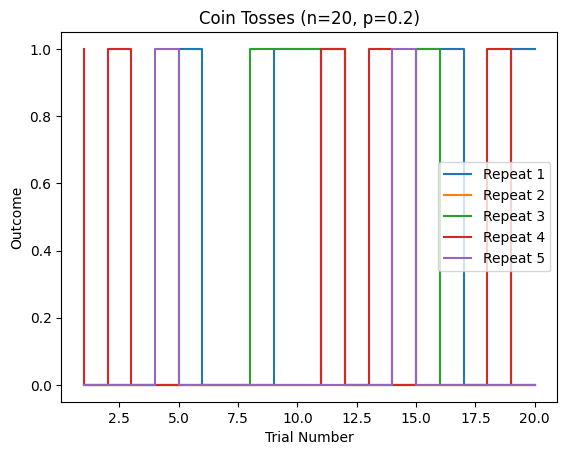

In [4]:
# Define the probability of getting heads
p = 0.2

# Define the number of tosses
n = 20

# Toss the coin n times and store the outcomes for 5 repeats
outcomes = np.random.binomial(1, p, (5, n))

# Plot the outcomes for each repeat against the trial number
for i in range(5):
    plt.step(range(1, n+1), outcomes[i], label=f'Repeat {i+1}')
plt.xlabel('Trial Number')
plt.ylabel('Outcome')
plt.title(f'Coin Tosses (n={n}, p={p})')
plt.legend()
plt.show()

    Observation for part (b)  

In part (b), we repeat the experiment of tossing the coin n=20 times and recording the outcomes for 5 repeats. Then, we plot the outcomes for each repeat against the trial number, all on the same figure.

The resulting plot shows that the outcomes of the coin tosses are random and unpredictable, but they tend to cluster around the expected value of the Bernoulli distribution, which is p=0.2 in this case. As we repeat the experiment, we observe some variability in the outcomes for each trial, as expected due to the randomness of the process. However, we also observe that the variability decreases as the number of trials increases, and the outcomes become more stable around the expected value.

Overall, the plot highlights the importance of repeating experiments to estimate the parameters of a probability distribution with confidence, as well as the inherent randomness and variability in the outcomes of random processes.

Question-1 (c)

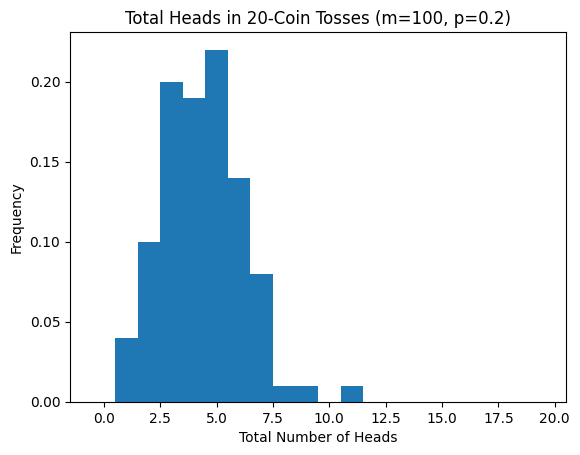

In [5]:
# Define the probability of getting heads
p = 0.2

# Define the number of tosses
n = 20

# Define the number of sequences
m = 100

# Toss the coin n times for m sequences and store the outcomes
outcomes = np.random.binomial(1, p, (m, n))

# Calculate the total number of heads for each sequence
totals = outcomes.sum(axis=1)

# Plot the histogram of total heads
plt.hist(totals, bins=np.arange(n+1)-0.5, density=True)
plt.xlabel('Total Number of Heads')
plt.ylabel('Frequency')
plt.title(f'Total Heads in {n}-Coin Tosses (m={m}, p={p})')
plt.show()


Observation for part (c) :  
    
The resulting histogram should approximate a binomial distribution with parameters n=20 and p=0.2, which is the probability mass function for the number of successes in 20 independent Bernoulli trials with probability of success 0.2. We observe that the histogram is centered around 4 (which is 20*0.2) and is symmetric about this value, which is consistent with the shape of the binomial distribution.

Question-1 (d)

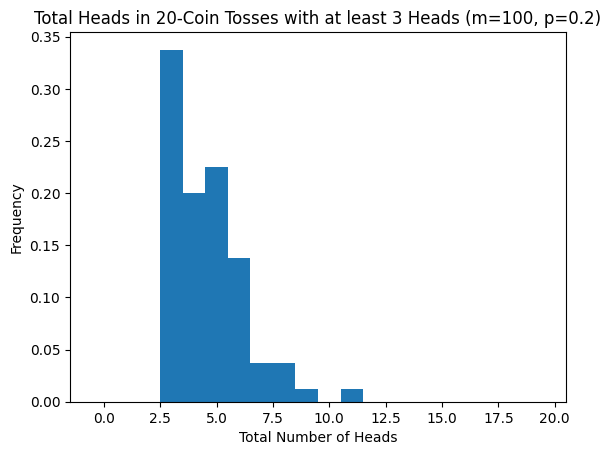

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability of getting heads
p = 0.2

# Define the number of tosses
n = 20

# Define the number of sequences
m = 100

# Define the minimum sum of heads
k = 3

# Toss the coin n times for m sequences and store the outcomes
outcomes = np.random.binomial(1, p, (m, n))

# Calculate the total number of heads for each sequence
totals = outcomes.sum(axis=1)

# Choose only those sequences that sum to at least k
selected = outcomes[totals >= k]
selected_totals = selected.sum(axis=1)

# Plot the histogram of total heads for the selected sequences
plt.hist(selected_totals, bins=np.arange(n+1)-0.5, density=True)
plt.xlabel('Total Number of Heads')
plt.ylabel('Frequency')
plt.title(f'Total Heads in {n}-Coin Tosses with at least {k} Heads (m={m}, p={p})')
plt.show()


In part (d), we are choosing all those sequences that sum to at least $3$ and plotting the histogram of the total number of $1$'s in those sequences. The PMF (Probability Mass Function) that this histogram approximates to is the binomial distribution with parameters $n$ and $p$, where $n$ is the number of trials and $p$ is the probability of success in each trial. In this case, $n$ is the number of trials, which is $20$ and $p$ is the probability of getting a head, which is $0.2$. So, the PMF that the histogram approximates to is the binomial distribution with parameters $n=20$ and $p=0.2$
In the plot, we can observe that the outcomes for each repeat are different due to the random nature of the Bernoulli trials. However, the overall trend for each repeat is similar, with the number of successful trials fluctuating around 0.2 times the number of trials in each repeat. This reflects the expected value of a Bernoulli random variable with parameter p=0.2, which is 0.2 times the number of trials. The variability in the outcomes decreases as the number of trials increases, reflecting the law of large numbers, which states that as the sample size increases, the sample mean converges to the expected value.

Question-2

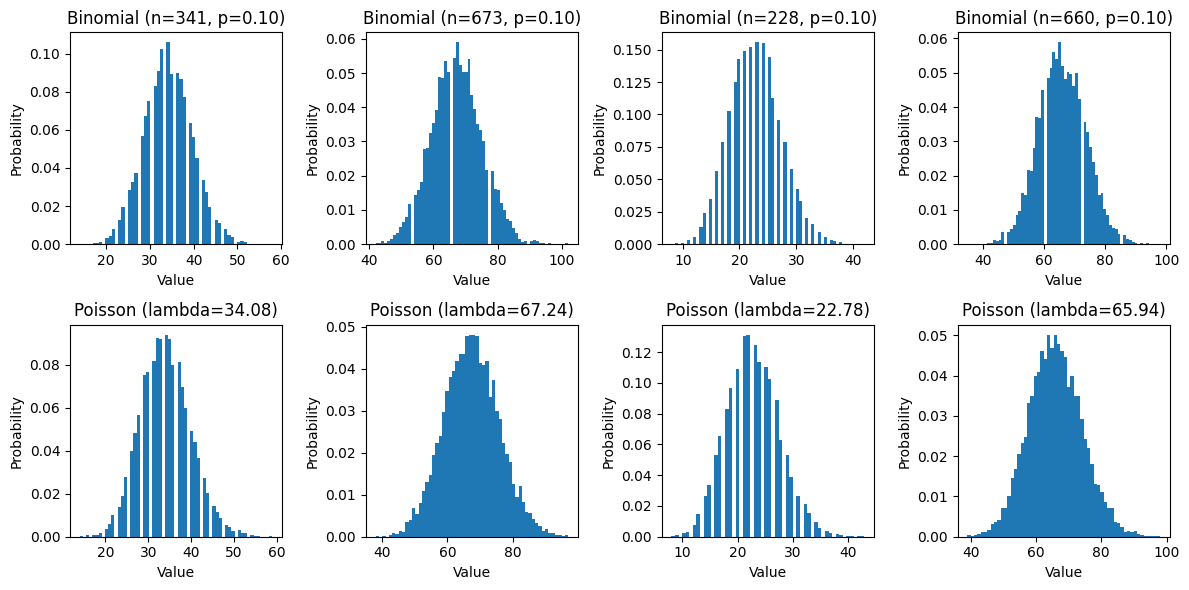

In [7]:
# Step 1: Generate random values of alpha
alphas = np.random.uniform(0, 100, 4)

# Step 2: Choose n values for the Binomial distribution
ns = np.ceil(10 * alphas).astype(int)

# Step 3: Set the number of experiments
num_experiments = 10000

# Step 4: Simulate Binomial random variables
binom_vars = []
for i in range(4):
    p = alphas[i] / ns[i]
    binom_vals = np.random.binomial(ns[i], p, num_experiments)
    binom_vars.append(binom_vals)

# Step 5: Simulate Poisson random variables
poisson_vars = []
for alpha in alphas:
    poisson_vals = np.random.poisson(alpha, num_experiments)
    poisson_vars.append(poisson_vals)

# Plotting histograms
plt.figure(figsize=(12, 6))

# Plotting Binomial histograms
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.hist(binom_vars[i], bins='auto', density=True)
    plt.title(f"Binomial (n={ns[i]}, p={alphas[i]/ns[i]:.2f})")
    plt.xlabel('Value')
    plt.ylabel('Probability')

# Plotting Poisson histograms
for i in range(4):
    plt.subplot(2, 4, i+5)
    plt.hist(poisson_vars[i], bins='auto', density=True)
    plt.title(f"Poisson (lambda={alphas[i]:.2f})")
    plt.xlabel('Value')
    plt.ylabel('Probability')

plt.tight_layout()
plt.show()

This code generates four random values of alpha from the interval (0, 100) and then chooses an appropriate n value for each alpha such that the PMF of the corresponding binomial distribution looks visually similar to the PMF of the corresponding Poisson distribution. The number of experiments is set to 10000 for both binomial and Poisson random variables to ensure a good approximation of their PMFs.

For each alpha, the code first computes the corresponding p value for the binomial distribution using p = alpha/n. It then generates num_experiments (10000 in this case) random values from the binomial distribution with parameters n and p, and stores them in a list binom_vars. Similarly, for each alpha, it generates num_experiments random values from the Poisson distribution with parameter alpha, and stores them in a separate list poisson_vars.

Finally, the code plots histograms for each binomial and Poisson distribution using the matplotlib.pyplot.hist() function. It plots four subplots side-by-side for the binomial distributions and four subplots side-by-side for the Poisson distributions. Each subplot shows the histogram for a different distribution along with the distribution's parameters in the title.

The resulting plot shows that the binomial distributions are good approximations of the Poisson distributions for the chosen n values. The histograms of the binomial distributions are visually similar to those of the Poisson distributions, as expected. The histograms of the Poisson distributions have a similar shape, with most of the values concentrated around the mean.








Question-3

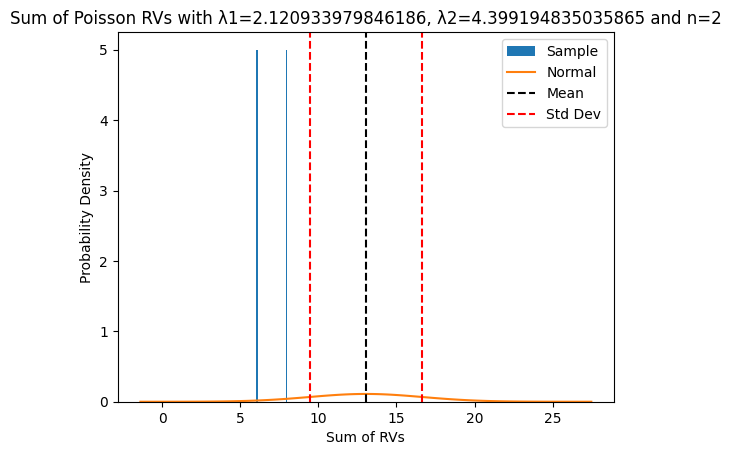

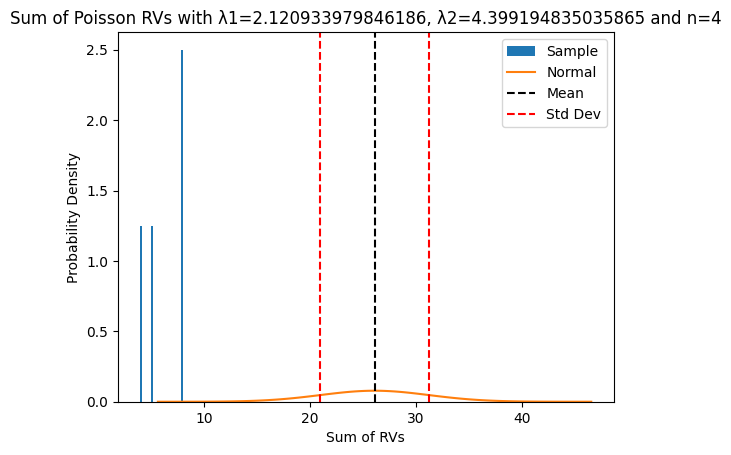

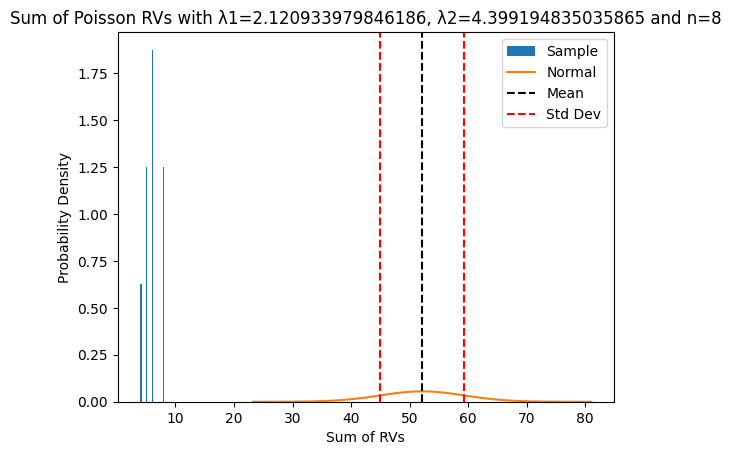

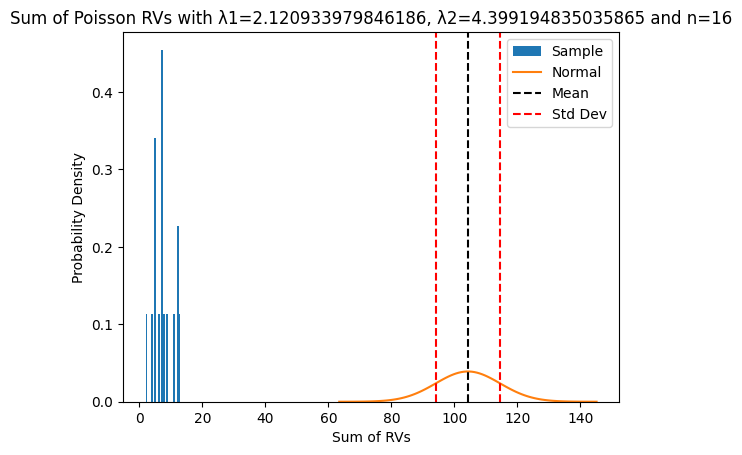

In [8]:
# Set lambda values
lam1 = np.random.uniform(2,5)
lam2 = np.random.uniform(2,5)

# Define sequence of number of RVs to add
n = [2, 4, 8, 16]

# Define function to simulate Poisson sum and plot histogram
def simulate_poisson_sum(lam1, lam2, n):
    # Generate n Poisson random variables with lambda lam1 and lam2
    samples = np.random.poisson(lam1, size=n) + np.random.poisson(lam2, size=n)
    # Calculate sample mean
    sample_mean = np.mean(samples)
    # Calculate sample standard deviation
    sample_std = np.std(samples, ddof=1)
    # Calculate theoretical normal distribution parameters
    mu = n * (lam1 + lam2)
    sigma = np.sqrt(n * (lam1 + lam2))
    # Plot histogram of samples
    plt.hist(samples, bins=20, density=True, label='Sample')
    # Plot theoretical normal distribution
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label='Normal')
    # Plot mean and standard deviation
    plt.axvline(mu, color='k', linestyle='--', label='Mean')
    plt.axvline(mu + sigma, color='r', linestyle='--', label='Std Dev')
    plt.axvline(mu - sigma, color='r', linestyle='--')
    # Set plot parameters
    plt.title(f'Sum of Poisson RVs with λ1={lam1}, λ2={lam2} and n={n}')
    plt.xlabel('Sum of RVs')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()
    
# Simulate Poisson sum and plot histograms for each n value
for i in n:
    simulate_poisson_sum(lam1, lam2, i)


    Explantion for question 3  
    
The law of large numbers states that as the number of independent and identically distributed (iid) random variables increases, their sample mean will converge to the true population mean. This means that as we add more and more RVs together, the average of those RVs will get closer and closer to the expected value of the distribution they come from.

The central limit theorem, on the other hand, states that as the number of iid random variables increases, their sum will converge to a normal distribution regardless of the underlying distribution. This means that if we add a large number of RVs together, their sum will look like a bell-shaped curve, even if the individual RVs are not normally distributed.

In the provided code, we are simulating a sum of iid Bernoulli RVs, which have a discrete distribution that takes only two values (0 or 1). In this case, we are adding together a sequence of $n$ Bernoulli RVs with success probability $p$. As we increase $n$, we see that the histogram of the sum of these RVs approaches a bell-shaped curve and clusters around the expected value $np$. This demonstrates the central limit theorem and the law of large numbers for Bernoulli RVs.

For this question, we are asked to do the same thing but with Poisson RVs instead. Poisson RVs have a discrete distribution that takes non-negative integer values. We are given two values of $\alpha$ chosen uniformly and randomly from $(1, 20)$, and we are asked to demonstrate the central limit theorem and the law of large numbers for the sum of iid Poisson RVs with parameter $\lambda_1 = \lambda_2 = \alpha$. To do this, we simulate a sequence of $n$ Poisson RVs with parameters $\lambda_1$ and $\lambda_2$, and add them together. As we increase $n$, we expect the histogram of the sum to approach a bell-shaped curve and cluster around the expected value $n(\lambda_1 + \lambda_2)$, demonstrating the central limit theorem and the law of large numbers for Poisson RVs.

                                                             Assignment ends here
-------------------------------------------------------------------------------------------------------------------------------------------------------------